In [45]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("student_exam_scores_large.csv")
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#from sklearn.model_selection import 
import numpy as np
import seaborn as sns

In [46]:
df.head()

,Hours_Studied,Attendance_Rate,Exam_Score
0,5.6,88.4,53.7
1,2.9,99.1,45.3
2,6.5,85.9,62.4
3,6.9,91.4,59.9
4,1.1,64.5,27.4


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hours_Studied    200 non-null    float64
 1   Attendance_Rate  200 non-null    float64
 2   Exam_Score       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [48]:
df.describe()

,Hours_Studied,Attendance_Rate,Exam_Score
count,200.000000,200.000000,200.000000
mean,4.937500,84.864500,49.801000
std,1.750389,9.550984,10.132147
min,1.000000,59.300000,26.200000
25%,3.700000,78.000000,41.975000
50%,4.900000,85.600000,50.100000
75%,6.100000,91.400000,56.800000
max,10.000000,100.000000,75.000000


## Problem statement
This analysis aims to examine how hours studied and attendance rate influence students’ exam scores, and to evaluate how well a linear regression model can predict exam performance based on these academic engagement factors.


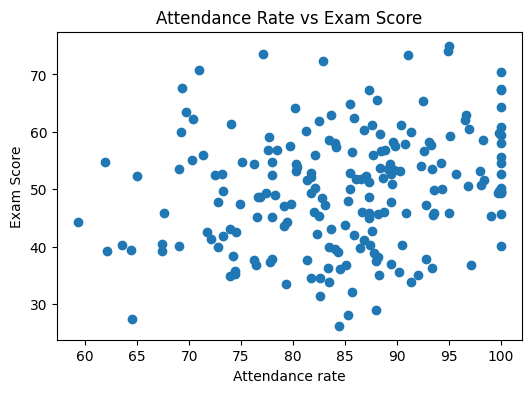

In [49]:
plt.figure(figsize = (6, 4))
plt.scatter(df['Attendance_Rate'], df['Exam_Score'])
plt.title('Attendance Rate vs Exam Score')
plt.xlabel('Attendance rate')
plt.ylabel('Exam Score')
plt.show()

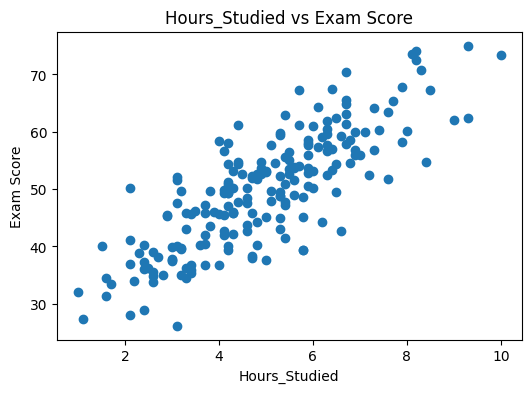

In [50]:
plt.figure(figsize = (6, 4))
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title('Hours_Studied vs Exam Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam Score')
plt.show()

In [51]:
df.corr()['Exam_Score']

Hours_Studied      0.814611
Attendance_Rate    0.217725
Exam_Score         1.000000
Name: Exam_Score, dtype: float64

In [52]:
pearsonr(df['Hours_Studied'], df['Exam_Score'])

PearsonRResult(statistic=0.8146114441941503, pvalue=1.0018546125041056e-48)

In [53]:
pearsonr(df['Attendance_Rate'], df['Exam_Score'])

PearsonRResult(statistic=0.21772506193508928, pvalue=0.0019546549785690597)

In [54]:
# fit a lineat regressionl
lr_model = LinearRegression()

In [55]:
X = df[['Hours_Studied']]
Y = df['Exam_Score']

In [56]:
df[['Hours_Studied']]

,Hours_Studied
0,5.6
1,2.9
2,6.5
3,6.9
4,1.1
...,...
195,3.2
196,6.3
197,4.2
198,5.0


In [57]:
lr_model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
df['Hours_Studied'].values.reshape(-1,1) 

array([[ 5.6],
       [ 2.9],
       [ 6.5],
       [ 6.9],
       [ 1.1],
       [ 2.4],
       [ 5.3],
       [ 4.4],
       [ 5. ],
       [ 3.3],
       [ 6.8],
       [ 6.6],
       [ 5.1],
       [ 7.3],
       [ 5.9],
       [ 3.3],
       [ 5.7],
       [ 3.1],
       [ 6.8],
       [ 4.9],
       [ 4.6],
       [ 3.6],
       [ 7.4],
       [ 4.7],
       [ 4.1],
       [ 4.3],
       [ 6.1],
       [ 5.7],
       [ 5.8],
       [ 5.9],
       [ 9.3],
       [ 4.2],
       [ 4. ],
       [ 3.4],
       [ 6.2],
       [ 7.3],
       [ 4.8],
       [ 3.3],
       [ 3.4],
       [ 6.3],
       [ 6.5],
       [ 6.1],
       [ 3.7],
       [ 5.5],
       [ 5.2],
       [ 5.4],
       [ 6.7],
       [ 5.4],
       [ 6.4],
       [ 5.1],
       [ 5.6],
       [ 6.3],
       [ 2.1],
       [ 4.4],
       [ 4.1],
       [ 3.7],
       [ 4.4],
       [ 8. ],
       [ 3.3],
       [ 6.9],
       [ 1.6],
       [ 4.3],
       [ 5.3],
       [ 6.2],
       [ 6.4],
       [ 6.6],
       [ 4

In [60]:
m = lr_model.coef_
m

array([4.71538665])

In [61]:
c = lr_model.intercept_
c

26.518778416744063

In [62]:
m * 4.5 + c


array([47.73801834])

In [63]:
df[['Exam_Score', 'Hours_Studied']]

,Exam_Score,Hours_Studied
0,53.7,5.6
1,45.3,2.9
2,62.4,6.5
3,59.9,6.9
4,27.4,1.1
...,...,...
195,39.8,3.2
196,56.6,6.3
197,51.3,4.2
198,53.2,5.0


In [64]:
y_pred = lr_model.predict(X)
y_pred 

array([52.92494366, 40.1933997 , 57.16879164, 59.0549463 , 31.70570373,
       37.83570638, 51.51032766, 47.26647968, 50.09571167, 42.07955436,
       58.58340764, 57.64033031, 50.56725033, 60.94110096, 54.33955965,
       42.07955436, 53.39648232, 41.13647703, 58.58340764, 49.624173  ,
       48.20955701, 43.49417036, 61.41263963, 48.68109567, 45.85186368,
       46.79494101, 55.28263698, 53.39648232, 53.86802099, 54.33955965,
       70.37187426, 46.32340235, 45.38032502, 42.55109303, 55.75417565,
       60.94110096, 49.15263434, 42.07955436, 42.55109303, 56.22571431,
       57.16879164, 55.28263698, 43.96570902, 52.45340499, 51.038789  ,
       51.98186633, 58.11186897, 51.98186633, 56.69725298, 50.56725033,
       52.92494366, 56.22571431, 36.42109038, 47.26647968, 45.85186368,
       43.96570902, 47.26647968, 64.24187161, 42.07955436, 59.0549463 ,
       34.06339706, 46.79494101, 51.51032766, 55.75417565, 56.69725298,
       57.64033031, 46.79494101, 45.85186368, 58.11186897, 48.20

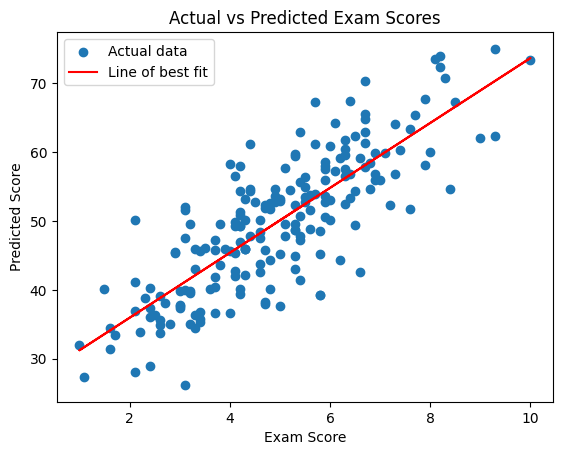

In [65]:
plt.scatter(X, Y, label='Actual data')
plt.plot(X, y_pred, color='red', label='Line of best fit')

plt.title("Actual vs Predicted Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()


This plot compares actual exam scores with the model’s predicted values. The strong alignment of data points along the line of best fit indicates that the linear regression model captures the relationship effectively and provides reasonably accurate predictions.

In [67]:
df.head()

,Hours_Studied,Attendance_Rate,Exam_Score
0,5.6,88.4,53.7
1,2.9,99.1,45.3
2,6.5,85.9,62.4
3,6.9,91.4,59.9
4,1.1,64.5,27.4


Spliting the data into training and testing using train test split

In [68]:


x = df[['Hours_Studied']]
y = df[['Exam_Score']]

In [69]:
# to split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# fit and train model with the training data
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [72]:
def evaluate_model(y_true, y_pred):
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse =np.sqrt(y_true, y_pred)


    return r2,mae,mse,rmse

In [73]:
# evaluating the model on train data
evaluate_model(y_train, y_train_pred)

(0.6593179866868724,
 4.646334477112401,
 34.20235219339494,
      Exam_Score
 79     7.823043
 197    7.162402
 38     5.983310
 24     6.480741
 122    7.930952
 ..          ...
 106    7.218033
 14     7.266361
 92     7.021396
 179    7.334848
 102    6.774954
 
 [160 rows x 1 columns])

In [74]:
# evaluate the model on the test data

evaluate_model(y_test, y_test_pred)

(0.6752906629968904,
 4.704394453850045,
 35.11039645857477,
      Exam_Score
 95     6.418723
 15     6.774954
 30     7.893035
 158    6.058052
 128    6.473021
 115    6.782330
 69     6.618157
 170    6.058052
 174    6.348228
 45     6.434283
 66     6.782330
 182    6.332456
 165    7.042727
 78     7.771744
 186    6.913754
 177    7.231874
 56     7.375636
 152    5.787918
 82     7.078135
 68     8.049845
 124    8.390471
 16     7.823043
 148    7.739509
 93     6.655825
 65     7.694154
 60     5.873670
 84     5.907622
 67     7.523297
 125    7.348469
 132    7.245688
 9      5.873670
 18     7.648529
 55     6.870226
 75     7.543209
 150    7.204165
 104    5.118594
 135    6.316645
 137    8.099383
 164    7.937254
 76     7.021396)

Insight:
The linear regression model shows consistent performance across training and test datasets. With R² values around 0.66–0.68, the model explains a substantial portion of the variability in exam scores. The similarity between training and testing errors indicates good generalization and no evidence of overfitting. 

## residual analysis

In [75]:
residuals = y_test - y_test_pred
residuals

,Exam_Score
95,34.781277
15,39.125046
30,54.406965
158,30.641948
128,35.426979
115,39.217670
69,37.181843
170,30.641948
174,33.951772
45,34.965717


<Axes: ylabel='Count'>

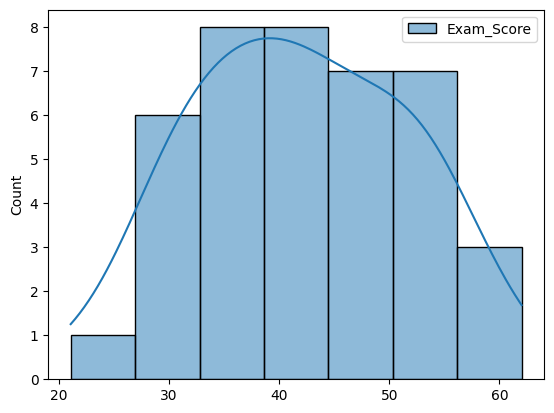

In [76]:
sns.histplot(residuals, kde = True)

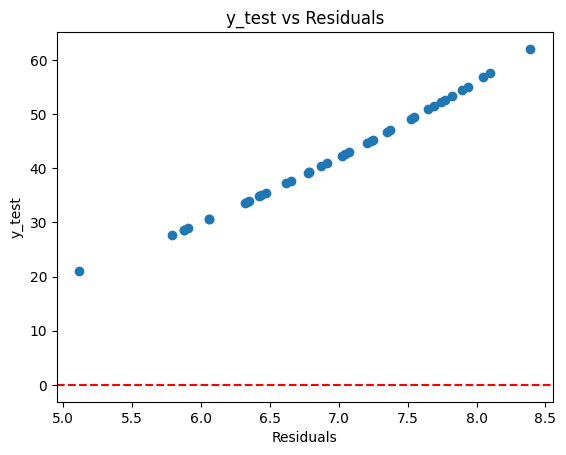

In [77]:
plt.scatter(y_test_pred, residuals)
plt.axhline(y = 0, color = 'r', linestyle = "--")
plt.title("y_test vs Residuals")
plt.xlabel("Residuals")
plt.ylabel("y_test")
plt.show()

The scatter plot shows a strong positive linear relationship between actual and predicted exam scores. The close alignment of data points with the line of best fit indicates that the model performs well, capturing most of the underlying trend while allowing for natural variability in student performance.